# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Pipeline classif infox supervisé

---

# Observations et environnement
---

In [1]:
random_state = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import importlib
import pandas as pd
import seaborn as sns

## Articles & Labels

In [4]:
import patat.db.label_db
filename = 'data/demo/230226-Label.csv'
label_db = patat.db.label_db.LabelDb(filename)
label_db.df()

,url,label,value,owner,type,url_h
0,https://www.alnas.fr/actualite/communaute/lara...,infox,0.000000,recueil,obs,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f
1,https://www.alnas.fr/actualite/communaute/lara...,signe,0.000000,recueil,obs,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f
2,https://www.alnas.fr/actualite/communaute/lara...,entites_nommees,1.000000,recueil,obs,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f
3,https://www.alnas.fr/actualite/communaute/lara...,entites_coherentes,1.000000,recueil,obs,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f
4,https://www.alnas.fr/actualite/communaute/lara...,ouverture_esprit,0.000000,recueil,obs,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f
...,...,...,...,...,...,...
266957,https://www.profession-gendarme.com/zelensky-e...,infox,0.556761,220930-tf_lr.pp,pred,e346761c2a99d892b26c9388480e0ee6ad6b303b
266958,https://www.profession-gendarme.com/zelensky-l...,infox,0.164531,220930-tf_lr.pp,pred,77525354644316eadab53960efa8f5fd028c7f67
266959,https://www.profession-gendarme.com/zelensky-m...,infox,0.673791,220930-tf_lr.pp,pred,fc6a074da5c02032bc9fc3f35f1044bc4029042c
266960,https://www.profession-gendarme.com/zero-mort-...,infox,0.103192,220930-tf_lr.pp,pred,e4f0a8961d79c9a5f66c80d7aa4196cb679af2b0


In [5]:
import patat.db.article_db
filename = 'data/demo/230226-Article.csv'
article_db = patat.db.article_db.ArticleDb(filename)
article_db.df()

/Volumes/Geek/Work/Patat/patat/db/article_db.py:37: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


,url,title,article,author,tag,abstract,site,date_iso,url_h,c_count
0,https://www.alnas.fr/actualite/en-vrac/les-emi...,Les Émirats arabes unis et l’Arabie saoudite f...,Plus des trois quarts des importations japonai...,Par Sarah -,"['Actualités', 'En vrac']",NaN,www.alnas.fr,2023-01-03T00:00:00,d9726057bcbe0182c5bec27f5cc2e1c73594a361,NaN
1,https://www.anguillesousroche.com/changement-c...,Article d’opinion du NY Times : « S’accoupler ...,« Nous serons plus nombreux à pouvoir monter d...,NaN,['Changement climatique'],NaN,www.anguillesousroche.com,2023-01-04T00:00:00,7dce1f2479231f6e9606c69da67444b634c2d32d,NaN
2,https://www.bvoltaire.fr/prediction-pour-2023-...,Prédiction pour 2023 : ça va bien se passer… j...,"Le 31 décembre dernier, Emmanuel Macron était,...",Frédéric Lassez,['Articles\nPolitique\nVoeux Macron'],NaN,www.bvoltaire.fr,2023-01-03T00:00:00,b11055abd5b8f6c385a79096ae29d90f8a0348ff,NaN
3,https://lesdeqodeurs.fr/le-premier-ministre-or...,Le Premier ministre Orbán affirme que le scand...,Article original datant du 16/12/22 par RMX.ne...,NaN,"['Andrea Cozzolino', 'Bruxelles', 'corruption'...",NaN,lesdeqodeurs.fr,2022-12-19T00:00:00,790fa6da6e1d9151e0ad6ce08627f738ad1e864c,NaN
4,https://lesobservateurs.ch/2022/12/18/herault-...,Hérault : 300 musulmans armés de kalachnikovs ...,"« La horde sauvage » nouvelle version, sans la...",Francis Gruzelle,[],NaN,lesobservateurs.ch,2022-12-18T00:00:00,2b314df4e0710050ae0441d6423177362127c784,NaN
...,...,...,...,...,...,...,...,...,...,...
86822,https://www.lelibrepenseur.org/une-histoire-vi...,Une histoire vieille comme le monde !,Certains veulent des preuves ! Ils ont raison....,Par\nAdmin,NaN,NaN,www.lelibrepenseur.org,2010-05-04T00:00:00,8c7a6ecf46d47da1912884a0c0a2837c69f7ad19,7851.0
86823,https://www.lelibrepenseur.org/actus/,Actus,"Dernière vidéo !\nIl était temps, enfin ! Je v...",Par\nuser,NaN,NaN,www.lelibrepenseur.org,2007-07-07T00:00:00,d4d5a37a8ff545664bea75664c8d8695e70d0941,2173.0
86824,https://www.lelibrepenseur.org/affiche-des-dec...,Affiche des décès et malaises de sportifs de h...,Un nombre inquiétant de sportifs de haut nivea...,NaN,NaN,NaN,www.lelibrepenseur.org,NaN,a175027896cf79e76dfad6409694fafacf1919b3,2193.0
86825,https://www.lelibrepenseur.org/communaute/,Communauté,Notre Réseau Telegram et ses Groupes Secondair...,NaN,NaN,NaN,www.lelibrepenseur.org,NaN,6ba257c7b15dd68cadf7dc5d6d8c584db0f1792e,2926.0


# Experience
---

## Textes

In [6]:
df_labels = label_db.df()

In [7]:
df_infox = df_labels[(df_labels['label']=='infox') & (df_labels['type'] == 'obs')].copy()

In [8]:
df_infox = df_infox[['url','value']]

In [9]:
df_infox = df_infox.rename(columns={'value': 'infox'})

In [10]:
df_infox = df_infox.merge(article_db.df()[['url','title','article','site']].copy())

In [11]:
df_infox['text'] = df_infox['title'] + '\n' + df_infox['article'] 

In [12]:
df_texts_afp =  pd.read_csv('data/demo/221221-TextAfp.csv')

## Statistiques sites 

In [13]:
df_infox.pivot_table(index='site',columns='infox',values='article',aggfunc='count').fillna(0).astype(int)

infox,0.0,1.0
site,,
actu.fr,2,0
fr.novopress.info,6,0
fr.sott.net,5,17
infodujour.fr,4,2
lalettrepatriote.com,1,3
lecourrier-du-soir.com,3,6
lemediaen442.fr,12,15
lesakerfrancophone.fr,4,8
lesdeqodeurs.fr,4,24


In [14]:
pd.DataFrame(article_db.df().value_counts('site'))

,0
site,
www.francesoir.fr,18454
www.francetvinfo.fr,14597
www.breizh-info.com,6071
www.dreuz.info,5143
www.legorafi.fr,4488
www.wikistrike.com,3900
www.profession-gendarme.com,3196
actu.fr,2874
www.lelibrepenseur.org,2617


## Taille articles

In [15]:
df_infox['c_count']=df_infox['text'].apply(len)

In [16]:
max_c_count = 50_000

In [17]:
df_infox[df_infox['c_count']>=max_c_count]

,url,infox,title,article,site,text,c_count
23,https://www.breizh-info.com/2022/04/19/185260/...,1.0,Covid-19. Une épidémie quasiment terminée avan...,Voici mon avant dernier bulletin de situation ...,www.breizh-info.com,Covid-19. Une épidémie quasiment terminée avan...,54474
75,https://www.dreuz.info/2022/04/attentats-crime...,1.0,"Attentats, crimes, tueries et autres atrocités...",Dreuz publie chaque année depuis 9 ans la list...,www.dreuz.info,"Attentats, crimes, tueries et autres atrocités...",109679
580,https://lezarceleurs.blogspot.com/2022/08/le-g...,1.0,Le ginseng du pauvre contre le covid,De : https://doorlesscarp953.substack.com/p/th...,lezarceleurs.blogspot.com,Le ginseng du pauvre contre le covid\nDe : htt...,178457
598,https://www.francesoir.fr/opinions-tribunes/le...,1.0,Les dangers de la numérisation du monde,Avec ce mode de gestion de la crise sanitaire ...,www.francesoir.fr,Les dangers de la numérisation du monde\nAvec ...,55263


In [18]:
df_infox = df_infox[df_infox['c_count']<max_c_count]

In [19]:
df_infox.shape

(631, 7)

In [20]:
df_infox = df_infox.reset_index()

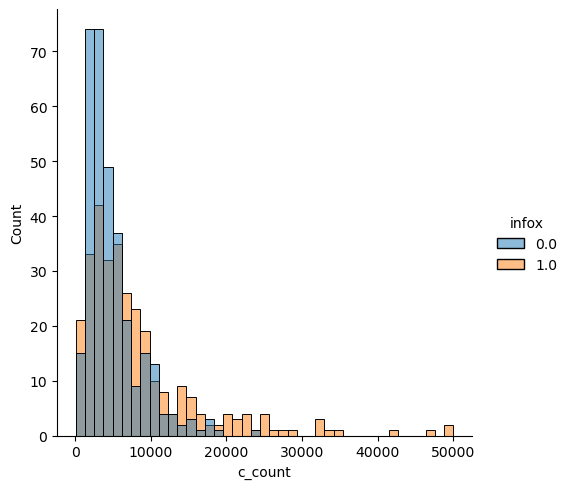

In [21]:
sns.displot(df_infox,x='c_count',hue='infox')

In [22]:
df_infox.groupby('infox').mean()

/var/folders/fr/mhrqmk5n1xs49b7jl3tgs2r00000gn/T/ipykernel_90954/3537168590.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_infox.groupby('infox').mean()


,index,c_count
infox,,
0.0,278.000000,4808.588957
1.0,358.659016,8187.937705


## Ignore Words / Lemmas

In [23]:
import patat.util.text
import patat.ml.lex_analyser
lex = patat.ml.lex_analyser.LexAnalyser()

### Lemmas

In [24]:
preprocessor = patat.util.text.preprocess
tokenizer = lex.get_lemmas_from_text

In [25]:
df_words = lex.get_df_words(texts= df_infox['text'],values = df_infox['infox'].astype(int), preprocessor=preprocessor, tokenizer= tokenizer)
### Rare Words
for occ_rare in [1,2,3,4,5,6,7]:
    df_words['rare_'+str(occ_rare)]=(df_words['count_0']<=occ_rare)&(df_words['count_1']<=occ_rare)
### Common words
for common_size in [50,80,120,200,500]:
    common_0 = df_words.sort_values('count_0',ascending=False).head(common_size).index
    common_1 = df_words.sort_values('count_1',ascending=False).head(common_size).index
    df_words['common_'+str(common_size)]=(df_words.index.isin(common_0))&(df_words.index.isin(common_1))
### Ignore Lemmas
ignore_lemmas={
    'None' : None,
    'small' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index),
    'medium' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index),
    'large' : list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index),
    'xlarge' : list(df_words[df_words['common_500']].index)+list(df_words[df_words['rare_7']].index),
}

/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [26]:
df_words

,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500
de,13806,20854,34660,False,False,False,False,False,False,False,True,True,True,True,True
la,8007,11165,19172,False,False,False,False,False,False,False,True,True,True,True,True
le,5905,8971,14876,False,False,False,False,False,False,False,True,True,True,True,True
et,5277,8799,14076,False,False,False,False,False,False,False,True,True,True,True,True
les,5186,9271,14457,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ire,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
irina,0,2,2,False,True,True,True,True,True,True,False,False,False,False,False
iron,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
ironic,0,2,2,False,True,True,True,True,True,True,False,False,False,False,False


## Pipeline

In [38]:
from sklearn import metrics
from sklearn.model_selection import cross_validate, train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

tokenizer = lex.get_lemmas_from_text

logreg = LogisticRegression(C=1, random_state=random_state, solver='lbfgs', multi_class='ovr', max_iter=1000)
neuralnet = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,8), random_state=random_state)

pipelineLR = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_lemmas['large'])), 
    ('classifier',logreg)
                  ])

pipelineMPLC = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_lemmas['large'])), 
    ('classifier',neuralnet)
                  ])

train_size = 0.80
X_train, X_test, y_train, y_test = train_test_split(df_texts['text'], df_texts['infox'], train_size=train_size, random_state=random_state)

for pipeline in [pipelineLR,pipelineMPLC]:
    pipeline.fit(X_train, y_train)

    y_preds = pipeline.predict(X_test)
    y_probas = pipeline.predict_proba(X_test)

    results = {}
    results['roc_auc'] = metrics.roc_auc_score(y_test, y_probas[:, 1])
    results['f1']=metrics.f1_score(y_test, y_preds)
    results['accuracy']=metrics.accuracy_score(y_test, y_preds)
    results['recall']=metrics.recall_score(y_test, y_preds)
    results['log_loss'] = metrics.log_loss(y_test, y_preds)
    cnf_matrix = metrics.confusion_matrix(y_test, y_preds,normalize='all')
    results['false_positive']=cnf_matrix[0,1]
    results['false_negative']=cnf_matrix[1,0]

    print(results)

/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'abrutir', 'affilier', 'agir', 'alambiquer', 'ambitieux', 'boire', 'bouillir', 'bruire', 'climatiser', 'commercer', 'conter', 'coordonner', 'croire', 'décombrer', 'grandir', 'granuler', 'inclure', 'intégrer', 'joindre', 'lire', 'matcher', 'maudire', 'menacer', 'nuire', 'obéir', 'oxygéner', 'presser', 'présumer', 'saisir', 'satisfaire', 'standardiser', 'structurer', 'subventionner', 'suivre', 'taler', 'teindre', 'tracter', 'urger', 'vieillir', 'vrombir', 'émerger', 'énoncer', 'équivaloir'] not in stop_words.
  warnings.warn(

{'roc_auc': 0.9024813895781637, 'f1': 0.8360655737704918, 'accuracy': 0.84251968503937, 'recall': 0.8225806451612904, 'log_loss': 5.676165888049946, 'false_positive': 0.07086614173228346, 'false_negative': 0.08661417322834646}


/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'abrutir', 'affilier', 'agir', 'alambiquer', 'ambitieux', 'boire', 'bouillir', 'bruire', 'climatiser', 'commercer', 'conter', 'coordonner', 'croire', 'décombrer', 'grandir', 'granuler', 'inclure', 'intégrer', 'joindre', 'lire', 'matcher', 'maudire', 'menacer', 'nuire', 'obéir', 'oxygéner', 'presser', 'présumer', 'saisir', 'satisfaire', 'standardiser', 'structurer', 'subventionner', 'suivre', 'taler', 'teindre', 'tracter', 'urger', 'vieillir', 'vrombir', 'émerger', 'énoncer', 'équivaloir'] not in stop_words.
  warnings.warn(

{'roc_auc': 0.9176178660049628, 'f1': 0.8688524590163934, 'accuracy': 0.8740157480314961, 'recall': 0.8548387096774194, 'log_loss': 4.5409327104399555, 'false_positive': 0.05511811023622047, 'false_negative': 0.07086614173228346}


## Entrainement sur tout le dataset

In [35]:
pipeline = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_lemmas['large'])), 
    ('classifier',logreg)
                  ])

pipeline.fit(df_texts['text'], df_texts['infox'])


/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'abrutir', 'affilier', 'agir', 'alambiquer', 'ambitieux', 'boire', 'bouillir', 'bruire', 'climatiser', 'commercer', 'conter', 'coordonner', 'croire', 'décombrer', 'grandir', 'granuler', 'inclure', 'intégrer', 'joindre', 'lire', 'matcher', 'maudire', 'menacer', 'nuire', 'obéir', 'oxygéner', 'presser', 'présumer', 'saisir', 'satisfaire', 'standardiser', 'structurer', 'subventionner', 'suivre', 'taler', 'teindre', 'tracter', 'urger', 'vieillir', 'vrombir', 'émerger', 'énoncer', 'équivaloir'] not in stop_words.
  warnings.warn(

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(preprocessor=<function preprocess at 0x15f137420>,
                                 stop_words=['de', 'la', 'le', 'et', 'les',
                                             'des', 'en', 'un', 'du', 'est',
                                             'une', 'que', 'avoir', 'être',
                                             'pour', 'qui', 'dans', 'il', 'par',
                                             'sur', 'pas', 'au', 'plaire', 'ce',
                                             'faire', 'qu', 'ne', 'pouvoir',
                                             'se', 'avec', ...],
                                 tokenizer=<bound method LexAnalyser.get_lemmas_from_text of <patat.ml.lex_analyser.LexAnalyser object at 0x1774768d0>>)),
                ('classifier',
                 LogisticRegression(C=1, max_iter=1000, multi_class='ovr',
                                    random_state=42))])

# Sauvegarde des résultats
---

In [36]:
import patat.util.file

In [39]:
patat.util.file.pickle_save(pipelineLR,'data/tmp/230425-LogRegInfox.pickle')

In [40]:
patat.util.file.pickle_save(pipelineMPLC,'data/tmp/230425-MPLCInfox.pickle')

# Conclusions
---

# Bricolages
---